In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [14]:
product_df = pd.read_csv("C:/Users/black/Downloads/amazon_products.csv/amazon_products.csv")


In [15]:
product_df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


In [16]:
product_df.isna()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1426332,False,False,False,False,False,False,False,False,False,False,False
1426333,False,False,False,False,False,False,False,False,False,False,False
1426334,False,False,False,False,False,False,False,False,False,False,False
1426335,False,False,False,False,False,False,False,False,False,False,False


In [17]:
avg_price = product_df['price'].mean()
print(f"Average Price: {avg_price}")

Average Price: 43.37540368089727


In [18]:
rating_distribution = product_df['stars'].value_counts()
print("Rating Distribution:")
print(rating_distribution)

Rating Distribution:
stars
4.6    182712
4.5    175045
4.7    153549
4.4    142804
0.0    131023
4.3    112262
5.0     94840
4.8     83291
4.2     81038
4.1     57997
4.0     51155
3.9     31414
3.8     23707
4.9     22325
3.7     16424
3.6     12521
3.5     11080
3.4      7329
3.0      7324
3.3      5765
1.0      4430
3.2      3958
3.1      3271
2.0      2072
2.9      1940
2.8      1399
2.7      1269
2.5      1237
2.6       861
2.4       542
2.3       405
2.2       327
2.1       280
1.5       230
1.9       146
1.8       113
1.7        88
1.4        62
1.6        60
1.3        36
1.2         6
Name: count, dtype: int64


In [20]:
high_rated_products = product_df[product_df['stars'] >= 4.5]

In [21]:
sorted_products = product_df.sort_values(by='price', ascending=False)
print(sorted_products.head())

              asin                                              title  \
594853  B077BCV1JT   Overland Storage Neoxl80 Storagelibrary Lto8 SAS   
108907  B0CJHXQS8R                                   replicas Marinas   
994047  B0000516QJ  CISCO Systems 1 Port ATM Enhanced Oc12/Stm4 Si...   
994048  B0000516Q1  Cisco Systems 7140 Router Dual 10/100 Fe Dual ...   
868945  B08XMXFW1Q  PARTNERS BRAND Corrugated Trash Can Plain - 40...   

                                                   imgUrl  \
594853  https://m.media-amazon.com/images/I/41ksAU5SLT...   
108907  https://m.media-amazon.com/images/I/81R-Xq0X+w...   
994047  https://m.media-amazon.com/images/I/11Tihbi9s1...   
994048  https://m.media-amazon.com/images/I/21rHMqCooA...   
868945  https://m.media-amazon.com/images/I/21qsXigx3C...   

                                  productURL  stars  reviews     price  \
594853  https://www.amazon.com/dp/B077BCV1JT    0.0        0  19731.81   
108907  https://www.amazon.com/dp/B0CJHXQS8R  

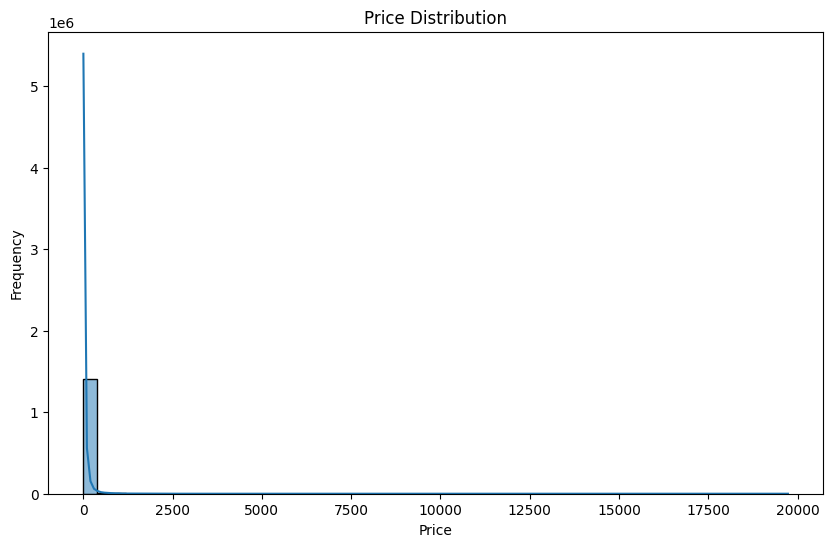

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(product_df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

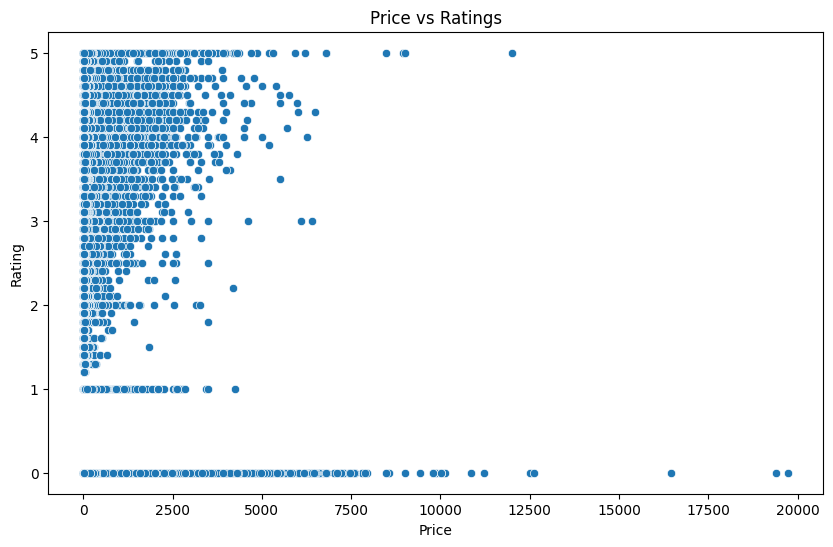

In [23]:
# Scatter plot to analyze prive vs ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=product_df)
plt.title('Price vs Ratings')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

In [25]:
# Feature Selection: Use relevant numerical features
X = product_df[['stars', 'reviews', 'listPrice', 'boughtInLastMonth']]
y = product_df['price']

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [ ]:
# Initialize and Train the Model